출처 : https://datascienceschool.net/view-notebook/f10aad8a34a4489697933f77c5d58e3a/

In [7]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1) 붓꽃 데이터 불러오기 

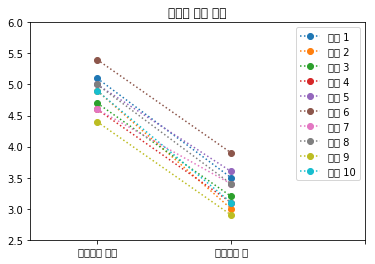

In [3]:
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침의 길이와 꽃받침의 폭만 선택

plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃받침의 길이", "꽃받침의 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃의 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()

Scikit-Learn 의 PCA 기능¶
Scikit-Learn 의 decomposition 서브패키지는 PCA분석을 위한 PCA 클래스를 제공한다. 사용법은 다음과 같다.

- 입력 인수:

 + n_components : 정수
- 메서드:

 + fit_transform : 특징행렬을 낮은 차원의 근사행렬로 변환
 + inverse_transform : 변환된 근사행렬을 원래의 차원으로 복귀
- 속성:

 + mean_ : 평균 벡터
 + components_ : 주성분 벡터
 
다음 코드는 붓꽃 데이터를 1차원으로 차원축소(근사)하는 예제 코드이다.

fit_transform 메서드로 구한 X_low는 1차원 근사 데이터의 집합이다. 이 값을 다시 inverse_transform 메서드에 넣어서 구한 X2는 다시 2차원으로 복귀한 근사 데이터의 집합이다.

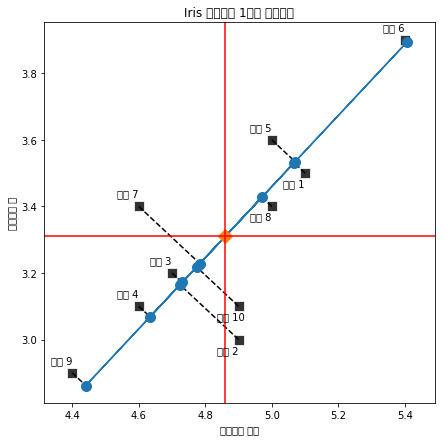

In [8]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침의 길이")
plt.ylabel("꽃받침의 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

In [10]:
# pca 전
X2

array([[5.06676112, 3.53108532],
       [4.7240094 , 3.1645881 ],
       [4.73047393, 3.17150049],
       [4.63393012, 3.06826822],
       [5.06999338, 3.53454152],
       [5.40628057, 3.89412635],
       [4.78359423, 3.22830091],
       [4.97021731, 3.42785306],
       [4.44084251, 2.86180369],
       [4.77389743, 3.21793233]])

In [9]:
# pca 후 결과
X_low

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [12]:
# 평균벡터
pca1.mean_

array([4.86, 3.31])

In [13]:
# 주성분 벡터
pca1.components_

array([[0.68305029, 0.73037134]])